In [1]:
import pandas as pd

In [2]:
"""
智能供应链分析
数据集：SupplyChainDataset.csv，供应链采购数据
To Do：
供应链数据探索
对用户进行分层运营
对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'
对于迟交货订单进行预测，即Delivery Status= 'Late delivery'
对于销售额进行预测，即Sales字段
对于订货数量进行预测，即Order Item Quantity
"""
# 数据加载
data = pd.read_csv('./SupplyChain.csv',encoding = 'unicode_escape')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
Type                             180519 non-null object
Days for shipping (real)         180519 non-null int64
Days for shipment (scheduled)    180519 non-null int64
Benefit per order                180519 non-null float64
Sales per customer               180519 non-null float64
Delivery Status                  180519 non-null object
Late_delivery_risk               180519 non-null int64
Category Id                      180519 non-null int64
Category Name                    180519 non-null object
Customer City                    180519 non-null object
Customer Country                 180519 non-null object
Customer Email                   180519 non-null object
Customer Fname                   180519 non-null object
Customer Id                      180519 non-null int64
Customer Lname                   180511 non-null object
Customer Password                180519 non-null obj

In [3]:
# 查看缺失值
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [4]:
#数据探索
data[['Customer Fname','Customer Lname']]
# Full Name = Fname + Lname
data['Customer Full Name'] = data['Customer Fname'] + data['Customer Lname']

In [5]:
data[['Customer Id','Customer Fname','Customer Lname','Customer Full Name']]

Customer Id Customer Fname Customer Lname Customer Full Name
0             20755          Cally       Holloway      CallyHolloway
1             19492          Irene           Luna          IreneLuna
2             19491        Gillian      Maldonado   GillianMaldonado
3             19490           Tana           Tate           TanaTate
4             19489           Orli      Hendricks      OrliHendricks
5             19488       Kimberly        Flowers    KimberlyFlowers
6             19487      Constance        Terrell   ConstanceTerrell
7             19486          Erica        Stevens       EricaStevens
8             19485        Nichole          Olsen       NicholeOlsen
9             19484          Oprah       Delacruz      OprahDelacruz
10            19483        Germane          Short       GermaneShort
11            19482          Freya        Robbins       FreyaRobbins
12            19481      Cassandra         Jensen    CassandraJensen
13            19480        Natalie       Mcfadden    NatalieMcfadden
14            19479      Kimberley         Sharpe    KimberleySharpe
15            19478           Sade      Lancaster      SadeLancaster
16            19477         Brynne          Giles        BrynneGiles
17            19476          Ciara           Bird          CiaraBird
18            19475             Bo        Griffin          BoGriffin
19            19474            Kim          Simon           KimSimon
20            19473         Kellie         Farmer       KellieFarmer
21            19472           Alma         Conley         AlmaConley
22            19471            Yeo           Bird            YeoBird
23            19470           Lucy       Mcknight       LucyMcknight
24            19469         Simone          Vance        SimoneVance
25            19468          Roary        Wheeler       RoaryWheeler
26            19467          Quail         Ashley        QuailAshley
27            19466         Hannah          Velez        HannahVelez
28            19465         Evelyn          Kelly        EvelynKelly
29            19464           Jael      Mcfarland      JaelMcfarland
...             ...            ...            ...                ...
180489         5187           Mary          Smith          MarySmith
180490         6251           Mary         Guerra         MaryGuerra
180491         6388           Emma          Smith          EmmaSmith
180492         1152          Maria          Smith         MariaSmith
180493         6244           Mary          Smith          MarySmith
180494         6244           Mary          Smith          MarySmith
180495          378           John        Stewart        JohnStewart
180496         2555           Mary           Long           MaryLong
180497         8260         Teresa           Berg         TeresaBerg
180498         2642           Mary          Gould          MaryGould
180499         1238         Angela         Massey       AngelaMassey
180500          773          Dylan         Horton        DylanHorton
180501         5424           Mary         Howard         MaryHoward
180502         5424           Mary         Howard         MaryHoward
180503         5424           Mary         Howard         MaryHoward
180504         8183           Ryan          Giles          RyanGiles
180505         1038      Christine         Briggs    ChristineBriggs
180506        11387          Larry          Smith         LarrySmith
180507         8247           Mary          Smith          MarySmith
180508         8387        Richard        Fuentes     RichardFuentes
180509            7        Melissa         Wilcox      MelissaWilcox
180510            7        Melissa         Wilcox      MelissaWilcox
180511         9314         Olivia          Smith        OliviaSmith
180512         7396           Mary         Madden         MaryMadden
180513         3080           Mary          Smith          MarySmith
180514         1005          Maria       Peterson      MariaPeterson
180515

In [6]:
data['Customer Zipcode'].value_counts()
#查看缺失值
data['Customer Zipcode'].isnull().sum()

3

In [7]:
# 对 Customer Zipcode 缺失值用0补全
data['Customer Zipcode'].fillna(0,inplace = True)
data['Customer Zipcode'].isnull().sum()

0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 用热力图探索数据相关性
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True,cmap ='coolwarm')

完全相关特征：<br>
Benefit per order与Order profit per order<br>
Sales per customer 与Sales,Order Item Total<br>
Category Id 与 Order Item Cardprod Id,ProductCard Id,Product Category Id<br>
Customer Id 与 Order  Customer ID<br>
Order Id 与 Order Item  Id<br>
Product Price 与 Order Item Product Price

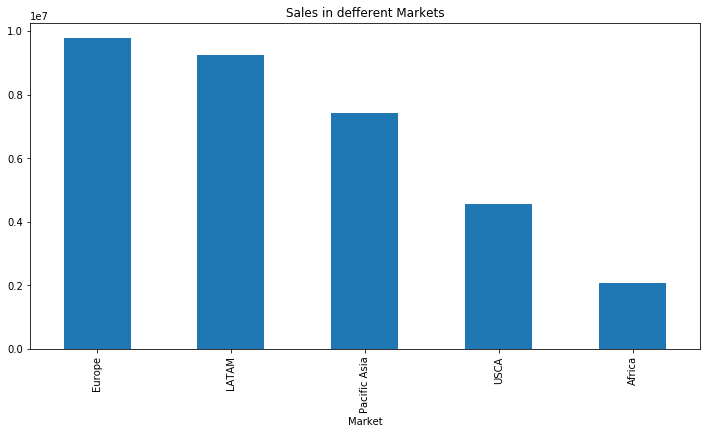

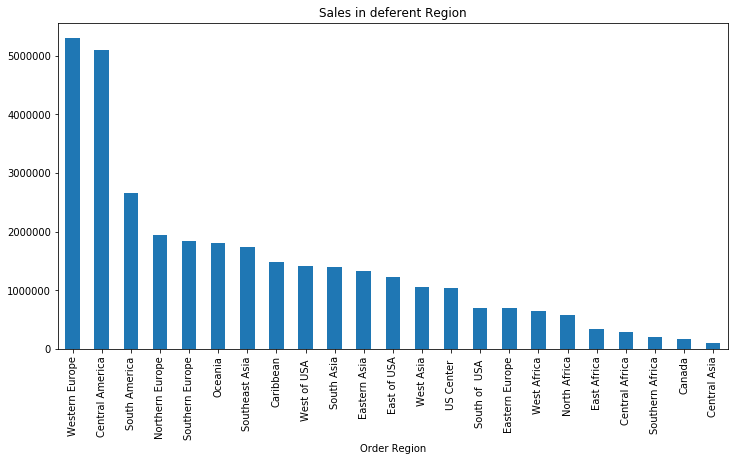

In [9]:
# 按照不同market
data['Market'].value_counts()
market = data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize=(12,6),title='Sales in defferent Markets')
plt.show()
# 按照不同的order region
data['Order Region'].value_counts()
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize =(12,6),title = 'Sales in deferent Region')
plt.show()

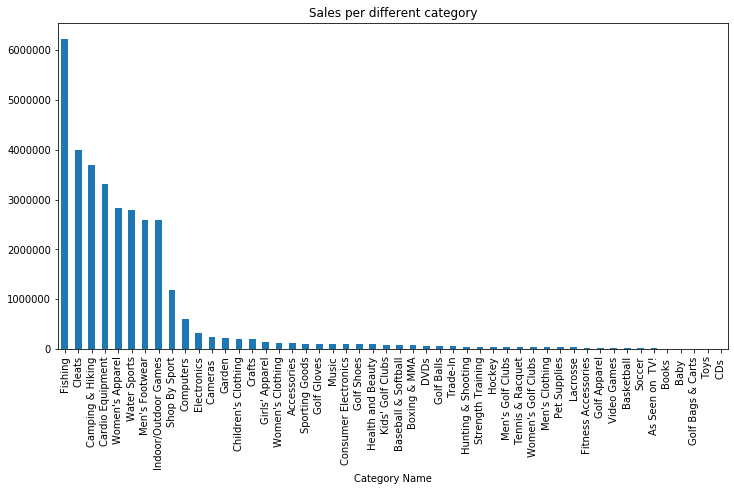

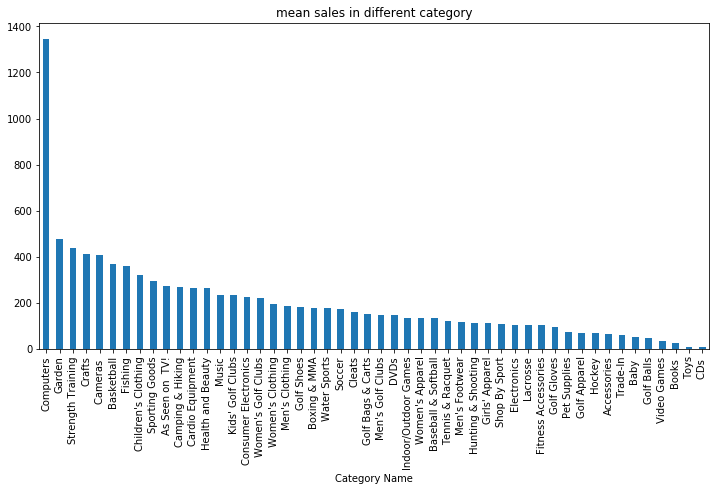

In [10]:
# 按照不同的Category Name
data['Category Name'].value_counts()
cat = data.groupby('Category Name')
# 按总和
cat['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize =(12,6),title ="Sales per different category")
plt.show()
# 按均值
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6),title='mean sales in different category')
plt.show()

In [11]:
# 按照不同时间维度（年，月，星期，小时）
data['order date (DateOrders)'].value_counts
# 创建时间戳索引
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [12]:
# 取order date中的year,month,weekday,hour,month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
# data['order_day'] = temp.day
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order_year','order_month','order_week_day','order_hour','order_month_year']]

order_year  order_month  order_week_day  order_hour order_month_year
0             2018            1               2          22          2018-01
1             2018            1               5          12          2018-01
2             2018            1               5          12          2018-01
3             2018            1               5          11          2018-01
4             2018            1               5          11          2018-01
5             2018            1               5          11          2018-01
6             2018            1               5          10          2018-01
7             2018            1               5          10          2018-01
8             2018            1               5          10          2018-01
9             2018            1               5           9          2018-01
10            2018            1               5           9          2018-01
11            2018            1               5           8          2018-01
12            2018            1               5           8          2018-01
13            2018            1               5           8          2018-01
14            2018            1               5           7          2018-01
15            2018            1               5           7          2018-01
16            2018            1               5           7          2018-01
17            2018            1               5           6          2018-01
18            2018            1               5           6          2018-01
19            2018            1               5           6          2018-01
20            2018            1               5           5          2018-01
21            2018            1               5           5          2018-01
22            2018            1               5           5          2018-01
23            2018            1               5           4          2018-01
24            2018            1               5           4          2018-01
25            2018            1               5           4          2018-01
26            2018            1               5           3          2018-01
27            2018            1               5           3          2018-01
28            2018            1               5           3          2018-01
29            2018            1               5           2          2018-01
...            ...          ...             ...         ...              ...
180489        2016            1               6          10          2016-01
180490        2016            1               6           5          2016-01
180491        2016            1               6           5          2016-01
180492        2016            1               6           5          2016-01
180493        2016            1               5          23          2016-01
180494        2016            1               5          23          2016-01
180495        2016            1               5          22          2016-01
180496        2016            1               5          22          2016-01
180497        2016            1               5          20          2016-01
180498        2016            1               5          19          2016-01
180499        2016            1               5          17          2016-01
180500        2016            1               5          15          2016-01
180501        2016            1               5          15          2016-01
180502        2016            1               5          15          2016-01
180503        2016            1               5          15          2016-01
180504        2016            1               5          13          2016-01
180505        2016            1               5          13          2016-01
180506        2016            1               5          11          2016-01
180507        2016            1               5           9          2016-01
180508        2016            1               5           7          2016-01
1805

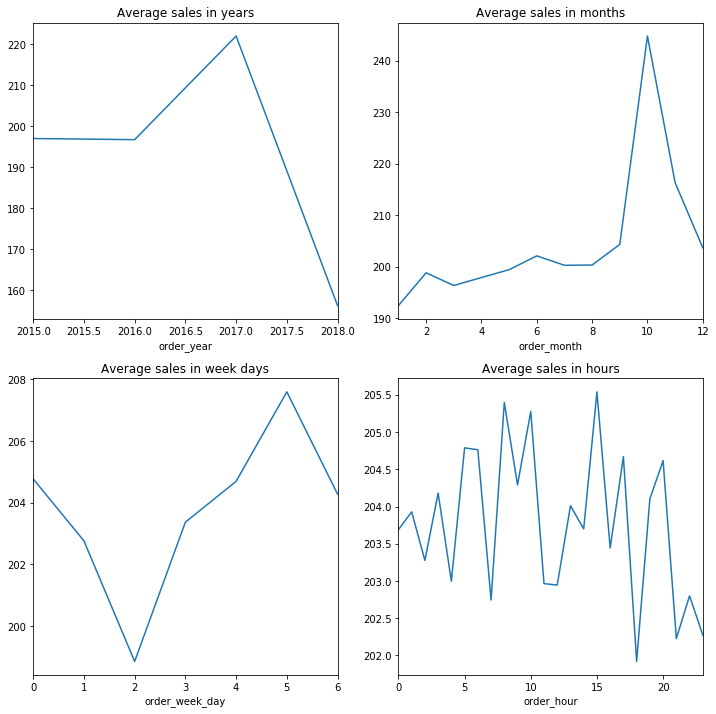

In [13]:
# 对销售额进行探索，按照不同时间维度
# plt.figure(figsize =(30,20))
plt.subplot(2,2,1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(figsize =(12,12),title = 'Average sales in years')

plt.subplot(2,2,2)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(figsize =(12,12),title = 'Average sales in months')

plt.subplot(2,2,3)
df_weekday = data.groupby('order_week_day')
df_weekday['Sales'].mean().plot(figsize=(12,12),title = 'Average sales in week days')

plt.subplot(2,2,4)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12,12),title ='Average sales in hours')
plt.show()

<Figure size 1440x720 with 0 Axes>

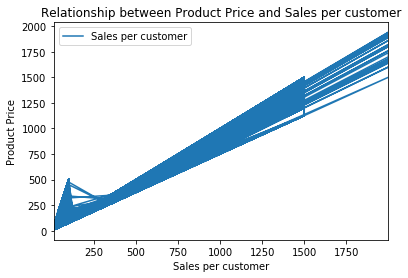

In [14]:
# Product Price 与 Sales per customer的关系
plt.figure(figsize = (20,10))
data.plot(x = 'Product Price',y = 'Sales per customer')
plt.title('Relationship between Product Price and Sales per customer')
plt.xlabel('Sales per customer')
plt.ylabel('Product Price')
plt.show()

In [15]:
# 用户分层
data['Total Price'] = data['Order Item Quantity'] * data['Order Item Total']
data[['Total Price','Order Item Quantity','Order Item Total']]

Total Price  Order Item Quantity  Order Item Total
0        314.640015                    1        314.640015
1        311.359985                    1        311.359985
2        309.720001                    1        309.720001
3        304.809998                    1        304.809998
4        298.250000                    1        298.250000
5        294.980011                    1        294.980011
6        288.420013                    1        288.420013
7        285.140015                    1        285.140015
8        278.589996                    1        278.589996
9        275.309998                    1        275.309998
10       272.029999                    1        272.029999
11       268.760010                    1        268.760010
12       262.200012                    1        262.200012
13       245.809998                    1        245.809998
14       327.750000                    1        327.750000
15       324.470001                    1        324.470001
16       321.200012                    1        321.200012
17       317.920013                    1        317.920013
18       314.640015                    1        314.640015
19       311.359985                    1        311.359985
20       309.720001                    1        309.720001
21       304.809998                    1        304.809998
22       298.250000                    1        298.250000
23       294.980011                    1        294.980011
24       288.420013                    1        288.420013
25       285.140015                    1        285.140015
26       278.589996                    1        278.589996
27       275.309998                    1        275.309998
28       272.029999                    1        272.029999
29       268.760010                    1        268.760010
...             ...                  ...               ...
180489   347.980011                    1        347.980011
180490   339.980011                    1        339.980011
180491   335.980011                    1        335.980011
180492   331.980011                    1        331.980011
180493   327.980011                    1        327.980011
180494   319.980011                    1        319.980011
180495   299.989990                    1        299.989990
180496   399.980011                    1        399.980011
180497   395.980011                    1        395.980011
180498   391.980011                    1        391.980011
180499   387.980011                    1        387.980011
180500   383.980011                    1        383.980011
180501   379.980011                    1        379.980011
180502   377.980011                    1        377.980011
180503   371.980011                    1        371.980011
180504   363.980011                    1        363.980011
180505   359.980011                    1        359.980011
180506   351.980011                    1        351.980011
180507   347.980011                    1        347.980011
180508   339.980011                    1        339.980011
180509   335.980011                    1        335.980011
180510   331.980011                    1        331.980011
180511   327.980011                    1        327.980011
180512   319.980011                    1        319.980011
180513   299.989990                    1        299.989990
180514   399.980011                    1        399.980011
180515   395.980011                    1        395.980011
180516   391.980011                    1        391.980011
180517   387.980011                    1        387.980011
180518   383.980011                    1        383.980011

[180519 rows x 3 columns]

In [16]:
# 转换时间格式
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)']

0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
5        2018-01-13 11:03:00
6        2018-01-13 10:42:00
7        2018-01-13 10:21:00
8        2018-01-13 10:00:00
9        2018-01-13 09:39:00
10       2018-01-13 09:18:00
11       2018-01-13 08:57:00
12       2018-01-13 08:36:00
13       2018-01-13 08:15:00
14       2018-01-13 07:54:00
15       2018-01-13 07:33:00
16       2018-01-13 07:12:00
17       2018-01-13 06:51:00
18       2018-01-13 06:30:00
19       2018-01-13 06:09:00
20       2018-01-13 05:48:00
21       2018-01-13 05:27:00
22       2018-01-13 05:06:00
23       2018-01-13 04:45:00
24       2018-01-13 04:24:00
25       2018-01-13 04:03:00
26       2018-01-13 03:42:00
27       2018-01-13 03:21:00
28       2018-01-13 03:00:00
29       2018-01-13 02:39:00
                 ...        
180489   2016-01-17 10:09:00
180490   2016-01-17 05:56:00
180491   2016-01-17 05:35:00
180492   2016-

In [17]:
# 统计最后一笔订单时间
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [18]:
# 假设现在时间是2018-02-01
import datetime
present = datetime.datetime(2018,2,1)
# 计算每个用户的RFM指标
# 按照Order Customer ID进行聚合
# x.max代表用户最后一次行为时间
# order id订单数量代表交易频率
customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)':lambda x :(present - x.max()).days, #recency
                                                     'Order Id':lambda  x:len(x), #frequency
                                                     'Total Price':lambda x:x.sum()}) #monetary
customer_seg

order date (DateOrders)  Order Id   Total Price
Order Customer Id                                                 
1                                      792         1   2362.250061
2                                      136        10   2842.700073
3                                      229        18   6143.760057
4                                      380        14   4370.629991
5                                      457         7   2993.790032
6                                      646        15  10029.160087
7                                      220        22  10943.190102
8                                      126        19  10723.489945
9                                      140        14   5530.910173
10                                     307         8   4281.530025
11                                     371        12   6701.979995
12                                     255        28  13100.249966
13                                     193        16   6838.799983
14                                     158        13   4682.730061
15                                     420         3    226.180000
16                                     123        17   4111.050037
17                                     284        17   6397.890106
18                                     405        15   7899.170006
19                                     464        24   9189.489991
20                                     291         6   6597.540168
21                                     295        17   6171.269970
22                                     387        16   5118.400047
23                                     501        20   9812.519947
24                                     684        15   7702.789994
25                                     641         4   1407.190010
26                                     190        13   4169.220078
27                                     301        11   6084.060001
28                                     296         7   6142.889916
29                                     354         5   4153.320106
30                                     580         8   2154.690015
...                                    ...       ...           ...
20728                                    0         1    203.949997
20729                                    0         1    205.029999
20730                                    0         1    207.190002
20731                                    0         1    209.350006
20732                                    0         1    211.500000
20733                                    0         1    213.660004
20734                                    0         1    215.820007
20735                                    0         1    161.869995
20736                                    0         1    172.660004
20737                                    0         1    176.970001
20738                                    0         1    179.130005
20739                                    0         1    181.289993
20740                                    0         1    183.449997
20741                                    0         1    187.759995
20742                                    0         1    189.919998
20743                                    0         1    194.240005
20744                                    0         1    196.399994
20745                                    0         1    200.710007
20746                                    0         1    203.949997
20747                                    0         1    205.029999
20748                                    0         1    207.190002
20749                                    0         1    209.350006
20750                                    0         1    211.500000
20751                                    0         1    213.660004
20752                                    0         1    215.820007
20753                                    0         1    161.869995
20754                                    0         1    172.660004

In [19]:
# 重命名为RFM
customer_seg.rename(columns = {'order date (DateOrders)':'R_value','Order Id':'F_value','Total Price':'M_value'},inplace = True)
customer_seg

R_value  F_value       M_value
Order Customer Id                                
1                      792        1   2362.250061
2                      136       10   2842.700073
3                      229       18   6143.760057
4                      380       14   4370.629991
5                      457        7   2993.790032
6                      646       15  10029.160087
7                      220       22  10943.190102
8                      126       19  10723.489945
9                      140       14   5530.910173
10                     307        8   4281.530025
11                     371       12   6701.979995
12                     255       28  13100.249966
13                     193       16   6838.799983
14                     158       13   4682.730061
15                     420        3    226.180000
16                     123       17   4111.050037
17                     284       17   6397.890106
18                     405       15   7899.170006
19                     464       24   9189.489991
20                     291        6   6597.540168
21                     295       17   6171.269970
22                     387       16   5118.400047
23                     501       20   9812.519947
24                     684       15   7702.789994
25                     641        4   1407.190010
26                     190       13   4169.220078
27                     301       11   6084.060001
28                     296        7   6142.889916
29                     354        5   4153.320106
30                     580        8   2154.690015
...                    ...      ...           ...
20728                    0        1    203.949997
20729                    0        1    205.029999
20730                    0        1    207.190002
20731                    0        1    209.350006
20732                    0        1    211.500000
20733                    0        1    213.660004
20734                    0        1    215.820007
20735                    0        1    161.869995
20736                    0        1    172.660004
20737                    0        1    176.970001
20738                    0        1    179.130005
20739                    0        1    181.289993
20740                    0        1    183.449997
20741                    0        1    187.759995
20742                    0        1    189.919998
20743                    0        1    194.240005
20744                    0        1    196.399994
20745                    0        1    200.710007
20746                    0        1    203.949997
20747                    0        1    205.029999
20748                    0        1    207.190002
20749                    0        1    209.350006
20750                    0        1    211.500000
20751                    0        1    213.660004
20752                    0        1    215.820007
20753                    0        1    161.869995
20754                    0        1    172.660004
20755                    0        1    314.640015
20756                    0        1     10.910000
20757                    0        1     34.980000

[20652 rows x 3 columns]

In [20]:
# 将RFM数据划分为4个尺度
quantiles = customer_seg.quantile([0.25,0.5,0.75])
quantiles

R_value  F_value      M_value
0.25     75.0      1.0   258.040008
0.50    159.0      7.0  2573.794999
0.75    307.0     15.0  6003.142554

In [21]:
# R值越小越好 R_value => R_Score
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 4
    elif a <= c[b][0.5]:
        return 3
    elif a <= c[b][0.75]:
        return 2
    else:
        return 1    

In [22]:
# F,M值越大越好 F_value,M_value => FM_Score
def FM_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.5]:
        return 2
    elif a <= c[b][0.75]:
        return 3
    else:
        return 4

In [23]:
# 新建R_Score字段，将R_value转化为[1,4]
customer_seg['R_Score'] = customer_seg['R_value'].apply(R_Score,args = ('R_value',quantiles))
# 新建F_Score字段，将F_value转化为[1,4]
customer_seg['F_Score'] = customer_seg['F_value'].apply(FM_Score,args = ('F_value',quantiles))
# 新建M_Score字段，将M_value转化为[1,4]
customer_seg['M_Score'] = customer_seg['M_value'].apply(FM_Score,args = ('M_value',quantiles))
customer_seg

R_value  F_value       M_value  R_Score  F_Score  M_Score
Order Customer Id                                                           
1                      792        1   2362.250061        1        1        2
2                      136       10   2842.700073        3        3        3
3                      229       18   6143.760057        2        4        4
4                      380       14   4370.629991        1        3        3
5                      457        7   2993.790032        1        2        3
6                      646       15  10029.160087        1        3        4
7                      220       22  10943.190102        2        4        4
8                      126       19  10723.489945        3        4        4
9                      140       14   5530.910173        3        3        3
10                     307        8   4281.530025        2        3        3
11                     371       12   6701.979995        1        3        4
12                     255       28  13100.249966        2        4        4
13                     193       16   6838.799983        2        4        4
14                     158       13   4682.730061        3        3        3
15                     420        3    226.180000        1        2        1
16                     123       17   4111.050037        3        4        3
17                     284       17   6397.890106        2        4        4
18                     405       15   7899.170006        1        3        4
19                     464       24   9189.489991        1        4        4
20                     291        6   6597.540168        2        2        4
21                     295       17   6171.269970        2        4        4
22                     387       16   5118.400047        1        4        3
23                     501       20   9812.519947        1        4        4
24                     684       15   7702.789994        1        3        4
25                     641        4   1407.190010        1        2        2
26                     190       13   4169.220078        2        3        3
27                     301       11   6084.060001        2        3        4
28                     296        7   6142.889916        2        2        4
29                     354        5   4153.320106        1        2        3
30                     580        8   2154.690015        1        3        2
...                    ...      ...           ...      ...      ...      ...
20728                    0        1    203.949997        4        1        1
20729                    0        1    205.029999        4        1        1
20730                    0        1    207.190002        4        1        1
20731                    0        1    209.350006        4        1        1
20732                    0        1    211.500000        4        1        1
20733                    0        1    213.660004        4        1        1
20734                    0        1    215.820007        4        1        1
20735                    0        1    161.869995        4        1        1
20736                    0        1    172.660004        4        1        1
20737                    0        1    176.970001        4        1        1
20738                    0        1    179.130005        4        1        1
20739                    0        1    181.289993        4        1        1
20740                    0        1    183.449997        4        1        1
20741                    0        1    187.759995        4        1        1
20742                    0        1    189.919998        4        1        1
20743                    0        1    194.240005        4        1        1
20744                    0        1    196.399994        4        1        1
20745                    0        1    200.710007        4        1        1
20746                    0        1    203.949997        4        1        1
20747          

In [24]:
# 计算RFM用户分层
def RFM_User(df):
    if df['M_Score'] > 2 and df['R_Score'] > 2 and df['F_Score'] > 2:
        return '重要价值用户'
    elif df['M_Score'] > 2 and df['R_Score'] >2 and df['F_Score'] <= 2:
        return '重要发展用户'
    elif df['M_Score'] > 2 and df['R_Score'] <= 2 and df['F_Score'] > 2:
        return '重要保持用户'
    elif df['M_Score'] > 2 and df['R_Score'] <= 2 and df['F_Score'] <= 2:
        return '重要挽留用户'
    if df['M_Score'] <= 2 and df['R_Score'] > 2 and df['F_Score'] > 2:
        return '一般价值用户'
    elif df['M_Score'] <= 2 and df['R_Score'] >2 and df['F_Score'] <= 2:
        return '一般发展用户'
    elif df['M_Score'] <= 2 and df['R_Score'] <= 2 and df['F_Score'] > 2:
        return '一般保持用户'
    elif df['M_Score'] <= 2 and df['R_Score'] <= 2 and df['F_Score'] <= 2:
        return '一般挽留用户'    

In [25]:
# 计算RFM用户分层
customer_seg['Customer_Segmentation'] = customer_seg.apply(RFM_User,axis =1)
customer_seg

R_value  F_value       M_value  R_Score  F_Score  M_Score  \
Order Customer Id                                                              
1                      792        1   2362.250061        1        1        2   
2                      136       10   2842.700073        3        3        3   
3                      229       18   6143.760057        2        4        4   
4                      380       14   4370.629991        1        3        3   
5                      457        7   2993.790032        1        2        3   
6                      646       15  10029.160087        1        3        4   
7                      220       22  10943.190102        2        4        4   
8                      126       19  10723.489945        3        4        4   
9                      140       14   5530.910173        3        3        3   
10                     307        8   4281.530025        2        3        3   
11                     371       12   6701.979995        1        3        4   
12                     255       28  13100.249966        2        4        4   
13                     193       16   6838.799983        2        4        4   
14                     158       13   4682.730061        3        3        3   
15                     420        3    226.180000        1        2        1   
16                     123       17   4111.050037        3        4        3   
17                     284       17   6397.890106        2        4        4   
18                     405       15   7899.170006        1        3        4   
19                     464       24   9189.489991        1        4        4   
20                     291        6   6597.540168        2        2        4   
21                     295       17   6171.269970        2        4        4   
22                     387       16   5118.400047        1        4        3   
23                     501       20   9812.519947        1        4        4   
24                     684       15   7702.789994        1        3        4   
25                     641        4   1407.190010        1        2        2   
26                     190       13   4169.220078        2        3        3   
27                     301       11   6084.060001        2        3        4   
28                     296        7   6142.889916        2        2        4   
29                     354        5   4153.320106        1        2        3   
30                     580        8   2154.690015        1        3        2   
...                    ...      ...           ...      ...      ...      ...   
20728                    0        1    203.949997        4        1        1   
20729                    0        1    205.029999        4        1        1   
20730                    0        1    207.190002        4        1        1   
20731                    0        1    209.350006        4        1        1   
20732                    0        1    211.500000        4        1        1   
20733                    0        1    213.660004        4        1        1   
20734                    0        1    215.820007        4        1        1   
20735                    0        1    161.869995        4        1        1   
20736                    0        1    172.660004        4        1        1   
20737                    0        1    176.970001        4        1        1   
20738                    0        1    179.130005        4        1        1   
20739                    0        1    181.289993        4        1        1   
20740                    0        1    183.449997        4        1        1   
20741                    0        1    187.759995        4        1        1   
20742                    0        1    189.919998        4        1        1   
20743                    0        1    194.240005        4        1        1   
20744                    0        1    196.399994        4        1        1   
20745              

In [26]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [27]:
#查看支付类型
data['Type'].unique()
data['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [28]:
# 不同地区使用支付方式的数量
payment1 = data[data['Type'] == 'DEBIT']
payment2 = data[data['Type'] == 'TRANSFER']
payment3 = data[data['Type'] == 'PAYMENT']
payment4 = data[data['Type'] == 'CASH']

count1 = payment1['Order Region'].value_counts()
count2 = payment2['Order Region'].value_counts()
count3 = payment3['Order Region'].value_counts()
count4 = payment4['Order Region'].value_counts()
count1

Central America    10804
Western Europe     10362
South America       5536
Oceania             3985
Northern Europe     3807
Southern Europe     3656
Southeast Asia      3567
West of USA         3187
Caribbean           3101
South Asia          3009
East of USA         2776
Eastern Asia        2634
US Center           2317
West Asia           2306
Eastern Europe      1577
South of  USA       1525
West Africa         1502
North Africa        1235
East Africa          737
Central Africa       659
Southern Africa      485
Canada               311
Central Asia         217
Name: Order Region, dtype: int64

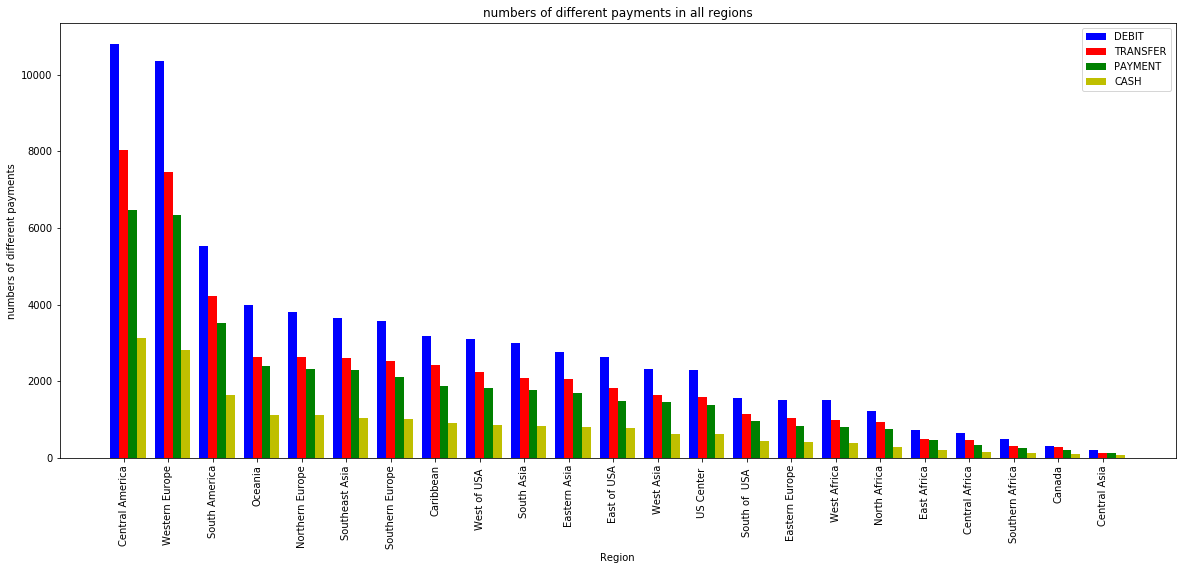

In [29]:
# 不同地区支付方式可视化
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (20,8))
region_num = len(count1)
index = np.arange(region_num)
# 每种类型的显示间隔
bar_width = 0.2

type1 = plt.bar(index,count1,bar_width,color = 'b',label = 'DEBIT')
type2 = plt.bar(index+bar_width,count2,bar_width,color = 'r',label = 'TRANSFER')
type3 = plt.bar(index+2*bar_width,count3,bar_width,color = 'g',label = 'PAYMENT')
type4 = plt.bar(index+3*bar_width,count4,bar_width,color = 'y',label = 'CASH')

plt.xlabel('Region')
plt.ylabel('numbers of different payments')
plt.title('numbers of different payments in all regions')
plt.legend()

#显示地区名称
names = data['Order Region'].value_counts().keys()
plt.xticks(index+bar_width,names,rotation = 'vertical')
plt.show()

分析结论：<br>
1.各个地区四种支付方式的占比相当；<br>
2.Debit是使用最多的支付方式；<br>
3.Cash是使用最少的支付方式。<br>

In [30]:
# 对负收益产品进行探索
loss = data[data['Order Profit Per Order']<0]
loss_total = loss['Order Profit Per Order'].sum()

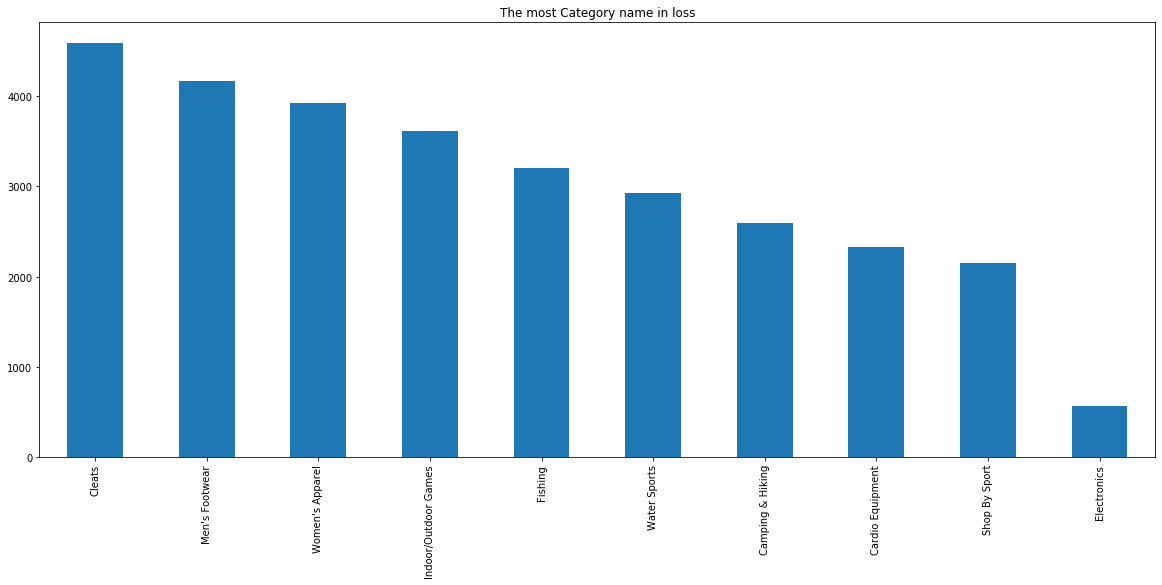

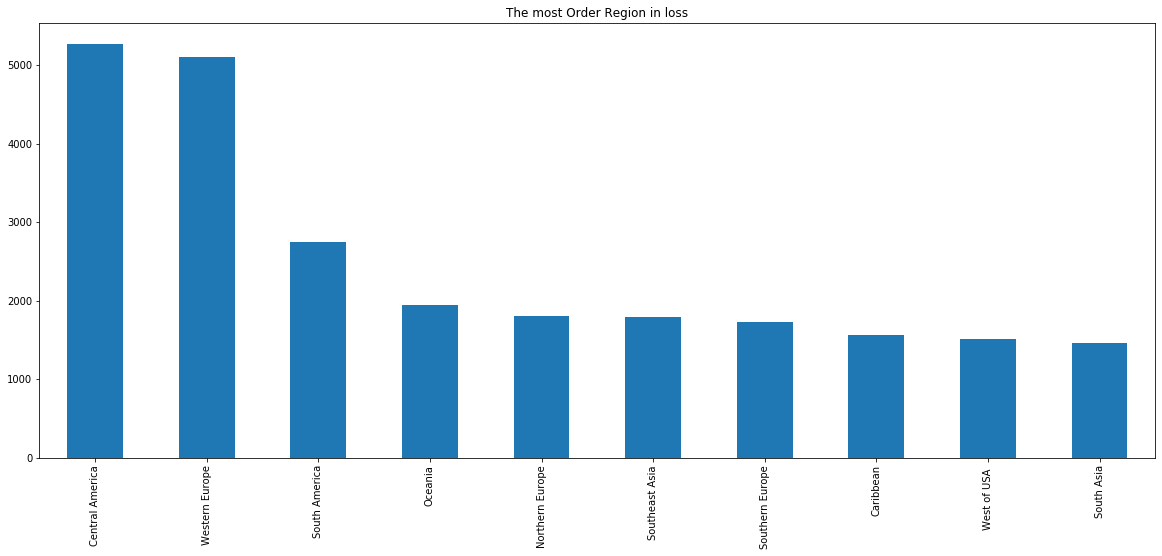

In [31]:
# 负收益产品中Category Name最多的top10
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize = (20,8),title = 'The most Category name in loss')
plt.show()
# 负收益的Order Region最多的top10
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize = (20,8),title = 'The most Order Region in loss')
plt.show()

In [32]:
# 欺诈订单的负收益水平
data['Order Status'].value_counts()
suspected_fraud = data[data['Order Status'] == 'SUSPECTED_FRAUD']
# 欺诈订单的负收益总和
loss_fraud = suspected_fraud[suspected_fraud['Order Profit Per Order'] <0]['Order Profit Per Order'].sum()

print('所有订单的负收益：',loss_total)
print('欺诈订单的负收益',loss_fraud)

所有订单的负收益： -3883547.345768667
欺诈订单的负收益 -90182.98003954


In [33]:
# 欺诈订单的支付方式
#负收益可能是欺诈交易导致的，但是负收益不一定是欺诈交易
suspected_fraud['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

分析结论：欺诈交易最有可能采用transfer支付方式

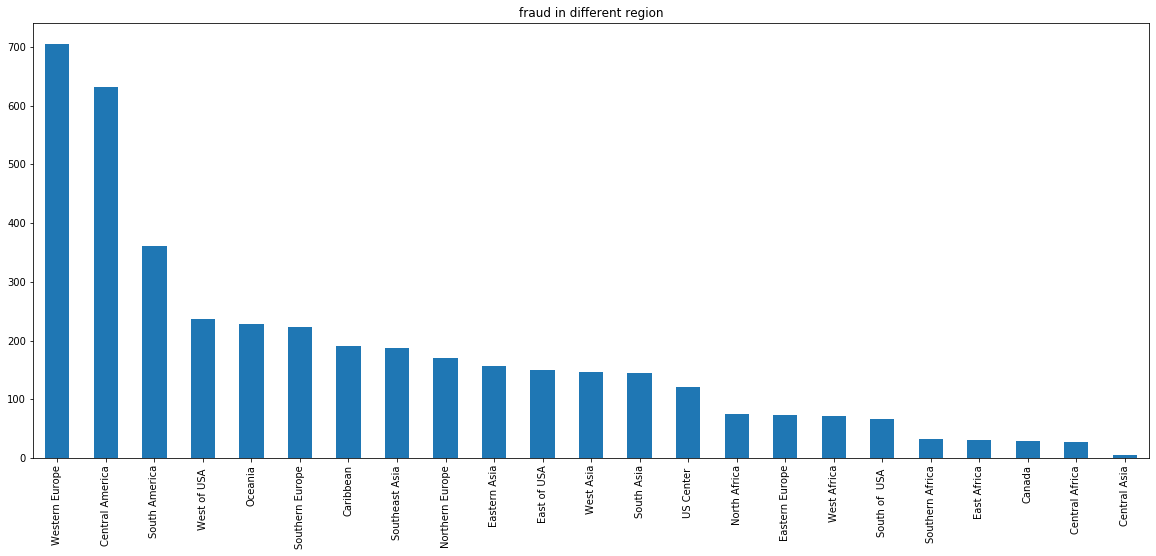

In [34]:
# 欺诈订单的区域
suspected_fraud['Order Region'].value_counts().plot.bar(figsize = (20,8),title = 'fraud in different region')
plt.show()

分析结论：西欧地区发生欺诈交易数量最高

In [35]:
# 西欧地区的欺诈商品品类top10
fraud_category_we = suspected_fraud[suspected_fraud['Order Region'] == 'Western Europe']['Category Name'].value_counts().nlargest(10)
# 所有欺诈商品品类top10
fraud_category_total = suspected_fraud['Category Name'].value_counts().nlargest(10)
print('西欧欺诈商品品类top10',fraud_category_we)
print('欺诈商品品类top10',fraud_category_total)

Men's Footwear          90
Cleats                  88
Women's Apparel         84
Water Sports            71
Indoor/Outdoor Games    68
Fishing                 62
Camping & Hiking        54
Cardio Equipment        49
Shop By Sport           41
Cameras                 13
Name: Category Name, dtype: int64
Cleats                  560
Men's Footwear          516
Women's Apparel         481
Indoor/Outdoor Games    439
Fishing                 394
Water Sports            329
Camping & Hiking        305
Cardio Equipment        276
Shop By Sport           228
Electronics              77
Name: Category Name, dtype: int64


In [67]:
# 西欧在欺诈品类top10中对应占比
fraud_category_we_to_total = []
for key in fraud_category_total.keys():
    fraud_category_we_to_total.append(suspected_fraud[suspected_fraud['Order Region'] == 'Western Europe'][suspected_fraud['Category Name'] == key]['Category Name'].value_counts().values.tolist())
print(fraud_category_we_to_total)
fraud_category_we_to_total = sum(fraud_category_we_to_total,[])
print(fraud_category_we_to_total)

[[88], [90], [84], [68], [62], [71], [54], [49], [41], [10]]
[88, 90, 84, 68, 62, 71, 54, 49, 41, 10]


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [52]:
print(fraud_category_total.values)

[560 516 481 439 394 329 305 276 228  77]


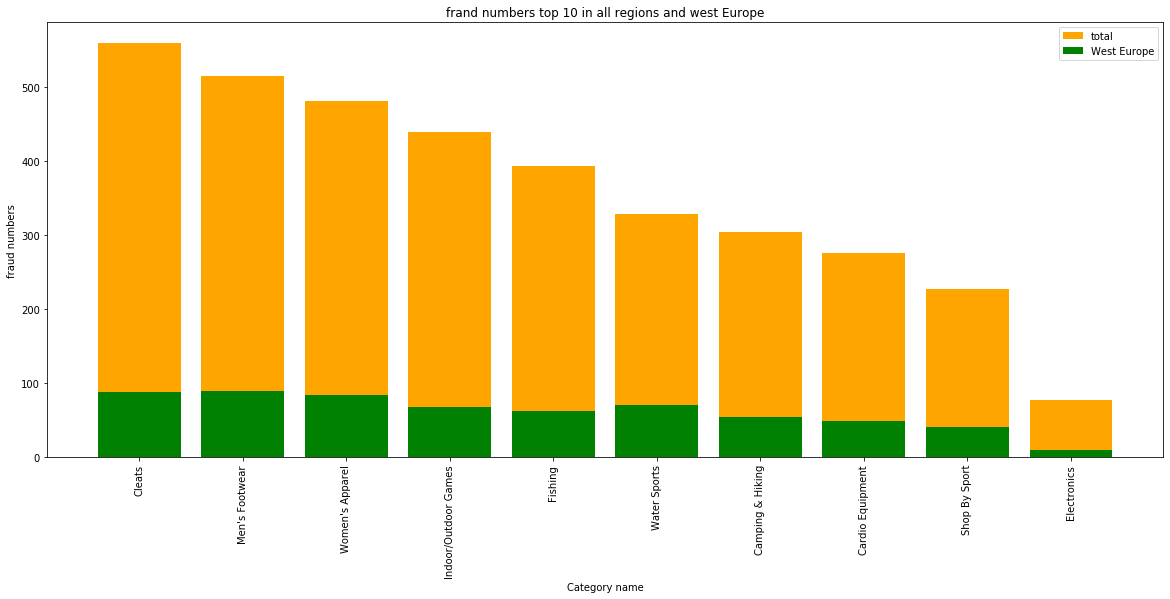

In [68]:
# 欺诈商品top10西欧地区占比
fig,ax = plt.subplots(figsize =(20,8))
index = np.arange(10)

fraud_total = plt.bar(index,fraud_category_total,color = 'orange',label = 'total')
fraud_we_to_total = plt.bar(index,fraud_category_we_to_total,color = 'green',label = 'West Europe')

plt.xticks(index,fraud_category_total.keys(),rotation = 'vertical')
plt.xlabel('Category name')
plt.ylabel('fraud numbers')
plt.title('frand numbers top 10 in all regions and west Europe') 
plt.legend()
plt.show()

MarySmith        528
RobertSmith       28
JamesSmith        23
DavidSmith        20
JonathanSmith     18
HenrySmith        16
MaryTorres        15
DanielSmith       15
MaryJones         14
SusanSmith        13
Name: Customer Full Name, dtype: int64


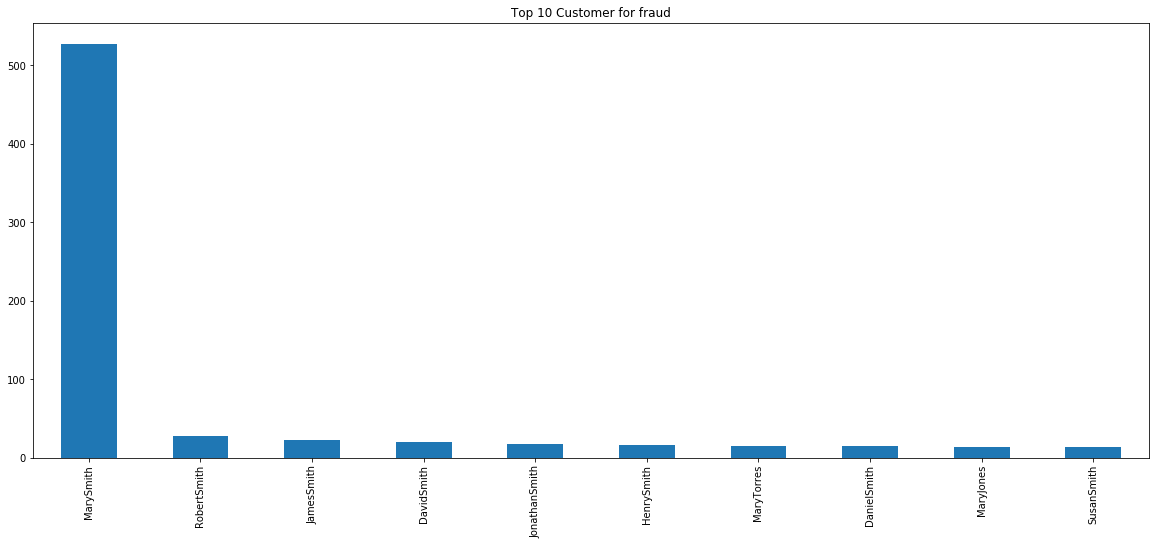

In [73]:
# 筛选top10欺诈行为的用户
cus = suspected_fraud['Customer Full Name'].value_counts().nlargest(10)
print(cus)
cus.plot.bar(figsize = (20,8),title = 'Top 10 Customer for fraud')
plt.show()

分析结论：1.MarySmith欺诈交易次数最多;2.姓氏为Smith的欺诈交易最多

In [77]:
# MarySmith的欺诈交易金额
amount = suspected_fraud[suspected_fraud['Customer Full Name'] == 'MarySmith']['Sales'].sum()
print(amount)

102491.66191043999


In [78]:
# 保存文件
import pickle

with open('data.pkl','wb') as file:
    pickle.dump(data,file)